In [68]:
import os
import pandas as pd

def func(pr_root_folder, ghi_root_folder, output_file):

    data = []

    for year_month_folder in os.listdir(pr_root_folder):
        pr_sub = os.path.join(pr_root_folder, year_month_folder)
        ghi_sub = os.path.join(ghi_root_folder, year_month_folder)

        if os.path.isdir(pr_sub) and os.path.isdir(ghi_sub):
            for filename in os.listdir(pr_sub):
                if filename.endswith('.csv'):
                    pr_file = os.path.join(pr_sub, filename)
                    ghi_file = os.path.join(ghi_sub, filename)
                    
                    if os.path.exists(ghi_file):
                        pr_data = pd.read_csv(pr_file)
                        ghi_data = pd.read_csv(ghi_file)

                        for index, row in pr_data.iterrows():
                            date = row['Date']  
                            pr_value = row['PR']  
                            ghi_value = ghi_data.loc[index, 'GHI']  

                            data.append([date, ghi_value, pr_value])


    final_df = pd.DataFrame(data, columns=['Date', 'GHI', 'PR'])

    if len(final_df) != 982:
        print("The Data does not have 982 rows.")



    final_df.to_csv(output_file, index=False)
    print(f"Data preprocessed and saved : {output_file}")

pr_root_folder = r'D:\pv data\PR'
ghi_root_folder = r'D:\pv data\GHI'
output_file = 'combined_data.csv'

func(pr_root_folder, ghi_root_folder, output_file)


Data preprocessed and saved : combined_data.csv


In [2]:
df=pd.read_csv(output_file)

In [3]:
df.head()

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440


In [4]:
df.isnull().sum()

Date    0
GHI     0
PR      0
dtype: int64

In [5]:
df.describe()

,GHI,PR
count,982.000000,982.000000
mean,4.629912,72.714933
std,1.024159,7.294222
min,1.413825,60.023886
25%,4.021665,66.309422
50%,4.737796,72.947945
75%,5.312283,79.111721
max,6.947317,84.980120


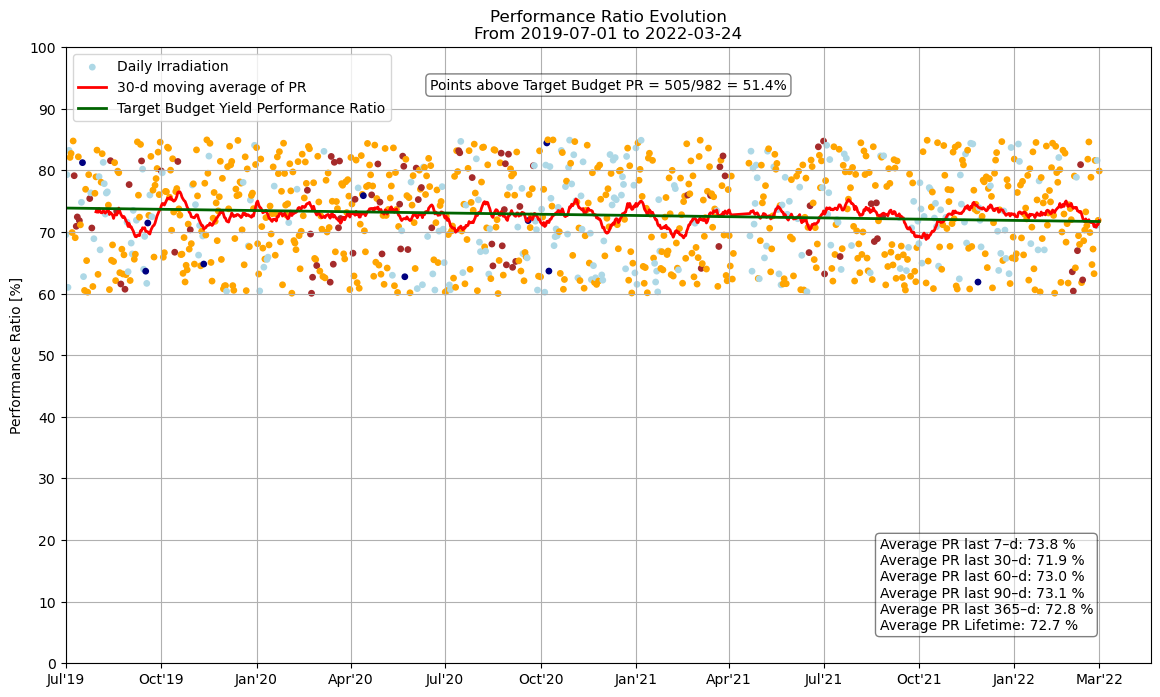

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def graph(data_file):

    df = pd.read_csv(data_file)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')
    
    df['30d_moving_avg'] = df['PR'].rolling(window=30).mean()
    
    start_date = pd.to_datetime('2019-07-01')
    df['Days'] = (df['Date'] - start_date).dt.days
    years_elapsed = df['Days'] / 365
    df['Budget'] = 73.9 - 0.8 * years_elapsed
    
    conditions = [
        (df['GHI'] < 2),
        (df['GHI'] >= 2) & (df['GHI'] < 4),
        (df['GHI'] >= 4) & (df['GHI'] < 6),
        (df['GHI'] >= 6)
    ]
    colors = ['navy', 'lightblue', 'orange', 'brown']
    df['Color'] = np.select(conditions, colors)
    
    avg_last_7d = df['PR'].tail(7).mean()
    avg_last_30d = df['PR'].tail(30).mean()
    avg_last_60d = df['PR'].tail(60).mean()
    avg_last_90d = df['PR'].tail(90).mean()
    avg_last_365d = df['PR'].tail(365).mean()
    avg_lifetime = df['PR'].mean()
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    scatter = ax.scatter(df['Days'], df['PR'], c=df['Color'], s=15, label='Daily Irradiation')
    
    ax.plot(df['Days'], df['30d_moving_avg'], color='red', label='30-d moving average of PR', linewidth=2)
    
    ax.plot(df['Days'], df['Budget'], color='darkgreen', label='Target Budget Yield Performance Ratio', linewidth=2)
    
    points_above_budget = df[df['PR'] > df['Budget']].shape[0]
    total_points = df.shape[0]
    percentage_above_budget = (points_above_budget / total_points) * 100
    
    textstr = f'Points above Target Budget PR = {points_above_budget}/{total_points} = {percentage_above_budget:.1f}%'
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    ax.text(0.5, 0.95, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props, ha='center')
    
    avg_text = (f'Average PR last 7–d: {avg_last_7d:.1f} %\n'
                f'Average PR last 30–d: {avg_last_30d:.1f} %\n'
                f'Average PR last 60–d: {avg_last_60d:.1f} %\n'
                f'Average PR last 90–d: {avg_last_90d:.1f} %\n'
                f'Average PR last 365–d: {avg_last_365d:.1f} %\n'
                f'Average PR Lifetime: {avg_lifetime:.1f} %')
    ax.text(0.75, 0.05, avg_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='bottom', bbox=props)

    
    ax.set_ylabel('Performance Ratio [%]')
    ax.set_title('Performance Ratio Evolution\nFrom 2019-07-01 to 2022-03-24')
    ax.set_xlim(left=0)
    
    x_ticks = pd.to_datetime(['2019-07-01', '2019-10-01', '2020-01-01', '2020-04-01',
                              '2020-07-01', '2020-10-01', '2021-01-01', '2021-04-01',
                              '2021-07-01', '2021-10-01', '2022-01-01', '2022-03-24'])
    x_labels = [date.strftime('%b\'%y') for date in x_ticks]
    ax.set_xticks((x_ticks - start_date).days)
    ax.set_xticklabels(x_labels)
    
    ax.set_yticks(np.arange(0, 110, 10))
    
    ax.grid(True)
    
    ax.legend(loc='upper left')
    plt.savefig("graph.png")
    plt.show()

data_file = 'combined_data.csv'
graph(data_file)



In [63]:
df

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
...,...,...,...
977,2022-03-20,4.226183,81.632738
978,2022-03-21,3.431675,71.057353
979,2022-03-22,3.580492,81.631509
980,2022-03-23,4.997617,71.906149
